In [1]:
import os
from analysis import calculate_metrics

In [2]:
#get transcriptions over the directory

# os.chdir('./dev-other')   
# for filename in os.listdir():
#     #if not DS_Store, go into the directory
#     if filename != '.DS_Store':
#         os.chdir(filename)
#         for file in os.listdir():
#             if file != '.DS_Store':
#                 os.chdir(file)
#                 for file in os.listdir():
#                     #if filename ends with flac, run the function
#                     if file.endswith('.flac'):
#                         get_assembly(file)
#                         get_openai(file)
#                         get_azure(file)
#                         await get_deepgram(file)
#                 os.chdir('..')
#         os.chdir('..')


In [3]:
#data collection storage

openai_wer_list = []
azure_wer_list = []
assembly_wer_list = []
deepgram_wer_list = []

openai_levenshtein_list = []
azure_levenshtein_list = []
assembly_levenshtein_list = []
deepgram_levenshtein_list = []

openai_response_time_list = []
azure_response_time_list = []
assembly_response_time_list = []
deepgram_response_time_list = []

openai_rtf_list = []
azure_rtf_list = []
assembly_rtf_list = []
deepgram_rtf_list = []

In [5]:
os.chdir('./dev-other')

for filename in os.listdir():
    #if not DS_Store, go into the directory
    if filename != '.DS_Store':
        os.chdir(filename)
        for file in os.listdir():
            if file != '.DS_Store':
                os.chdir(file)
                for file2 in os.listdir():
                    if 'trans' in file2:
                        ref_file = file2
                    elif 'openai' in file2:
                        openai_file = file2
                    elif 'azure' in file2:
                        azure_file = file2
                    elif 'assembly' in file2:
                        assembly_file = file2
                    elif 'deepgram' in file2:
                        deepgram_file = file2
                #extend each list with the list returned from the function
                temp = calculate_metrics(ref_file, openai_file)
                openai_wer_list.extend(temp[0])
                openai_levenshtein_list.extend(temp[1])
                openai_response_time_list.extend(temp[2])
                openai_rtf_list.extend(temp[3])

                temp = calculate_metrics(ref_file, azure_file)
                azure_wer_list.extend(temp[0])
                azure_levenshtein_list.extend(temp[1])
                azure_response_time_list.extend(temp[2])
                azure_rtf_list.extend(temp[3])

                temp = calculate_metrics(ref_file, assembly_file)
                assembly_wer_list.extend(temp[0])
                assembly_levenshtein_list.extend(temp[1])
                assembly_response_time_list.extend(temp[2])
                assembly_rtf_list.extend(temp[3])

                temp = calculate_metrics(ref_file, deepgram_file)
                deepgram_wer_list.extend(temp[0])
                deepgram_levenshtein_list.extend(temp[1])
                deepgram_response_time_list.extend(temp[2])
                deepgram_rtf_list.extend(temp[3])
                os.chdir('..')
        os.chdir('..')
        print(filename)

1255
1630
700
1585
3660
116
1650
1651
2506
3663
1701
1686


In [15]:
os.chdir('./dev-other/1255/138279/')

In [16]:
from analysis import wer, levenshtein

In [20]:
temp_wer = []
temp_levenshtein = []
temp_response_time = []
temp_rtf = []

with open('1255-138279.trans.txt') as f:
    ref = f.read().split('\n')
    ref.remove('')
        #convert ref to dictionary
    ref = [i.split(' ') for i in ref]
    ref = {i[0].strip(): ' '.join(i[1:]) for i in ref}
    
with open('1255-138279-openai.txt') as f:
    hyp = f.read().split('\n')
    hyp.remove('')
    hyp = [i.split(',') for i in hyp]
    hyp = {i[0].strip(): i[1:] for i in hyp}

for i in ref:
    temp_wer.append(wer(ref[i], hyp[i][0]))
    temp_levenshtein.append(levenshtein(ref[i], hyp[i][0]))
    temp_response_time.append(float(hyp[i][1].strip()))
    temp_rtf.append(float(hyp[i][2].strip()))

In [12]:
data_dict = {'openai_wer': openai_wer_list, 'azure_wer': azure_wer_list, 'assembly_wer': assembly_wer_list, 'deepgram_wer': deepgram_wer_list,
             'openai_levenshtein': openai_levenshtein_list, 'azure_levenshtein': azure_levenshtein_list, 'assembly_levenshtein': assembly_levenshtein_list, 'deepgram_levenshtein': deepgram_levenshtein_list,
             'openai_response_time': openai_response_time_list, 'azure_response_time': azure_response_time_list, 'assembly_response_time': assembly_response_time_list, 'deepgram_response_time': deepgram_response_time_list,
             'openai_rtf': openai_rtf_list, 'azure_rtf': azure_rtf_list, 'assembly_rtf': assembly_rtf_list, 'deepgram_rtf': deepgram_rtf_list}

In [13]:
import pickle

with open('data_dict.pickle', 'wb') as handle:
    pickle.dump(data_dict, handle)

In [34]:
with open('data_dict.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

In [35]:
data_dict.keys()

dict_keys(['openai_wer', 'azure_wer', 'assembly_wer', 'deepgram_wer', 'openai_levenshtein', 'azure_levenshtein', 'assembly_levenshtein', 'deepgram_levenshtein', 'openai_response_time', 'azure_response_time', 'assembly_response_time', 'deepgram_response_time', 'openai_rtf', 'azure_rtf', 'assembly_rtf', 'deepgram_rtf'])

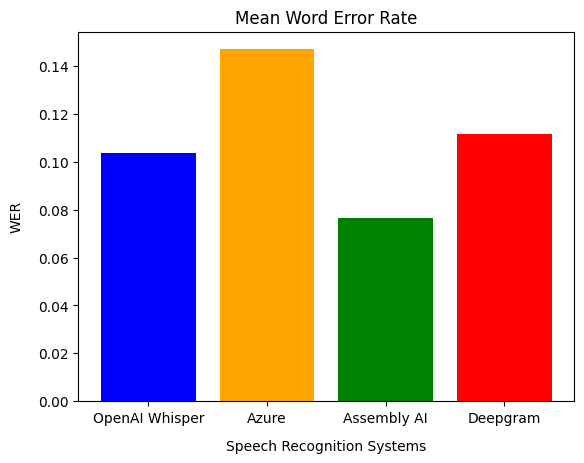

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as s

# Calculate the means of the data
o_mean, az_mean, a_mean, d_mean = s.mean(data_dict['openai_wer']), s.mean(data_dict['azure_wer']), s.mean(data_dict['assembly_wer']), s.mean(data_dict['deepgram_wer'])

# Define the labels, means, and colors
labels = ['OpenAI Whisper', 'Azure', 'Assembly AI', 'Deepgram']
means = [o_mean, az_mean, a_mean, d_mean]
colors = ['blue', 'orange', 'green', 'red']

# Plot the bar chart
plt.bar(labels, means, color=colors)

# Add a title and labels
plt.title('Mean Word Error Rate')
plt.xlabel('Speech Recognition Systems', labelpad=10)
plt.ylabel('WER', labelpad=10)

# Show the plot
plt.show()

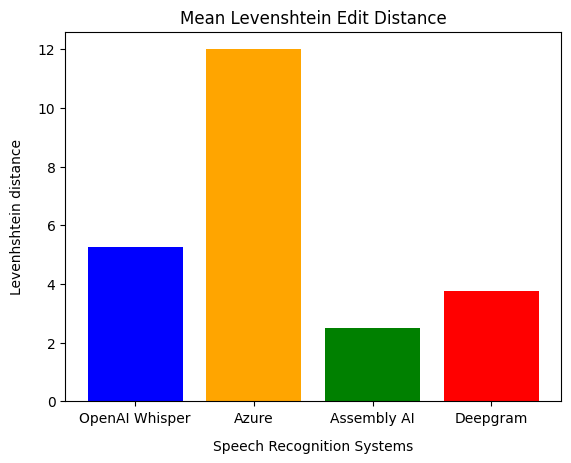

In [43]:
# Calculate the means of the data
o_mean, az_mean, a_mean, d_mean = s.mean(data_dict['openai_levenshtein']), s.mean(data_dict['azure_levenshtein']), s.mean(data_dict['assembly_levenshtein']), s.mean(data_dict['deepgram_levenshtein'])

# Define the labels, means, and colors
labels = ['OpenAI Whisper', 'Azure', 'Assembly AI', 'Deepgram']
means = [o_mean, az_mean, a_mean, d_mean]
colors = ['blue', 'orange', 'green', 'red']

# Plot the bar chart
plt.bar(labels, means, color=colors)

# Add a title and labels
plt.title('Mean Levenshtein Edit Distance')
plt.xlabel('Speech Recognition Systems', labelpad=10)
plt.ylabel('Levenhshtein distance', labelpad=10)

# Show the plot
plt.show()

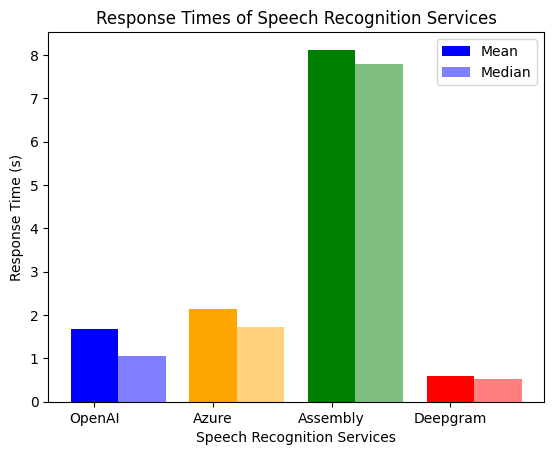

In [46]:
# Calculate the means and medians of the data
o_mean, az_mean, a_mean, d_mean = s.mean(data_dict['openai_response_time']), s.mean(data_dict['azure_response_time']), s.mean(data_dict['assembly_response_time']), s.mean(data_dict['deepgram_response_time'])
o_median, az_median, a_median, d_median = s.median(data_dict['openai_response_time']), s.median(data_dict['azure_response_time']), s.median(data_dict['assembly_response_time']), s.median(data_dict['deepgram_response_time'])

labels = ['OpenAI', 'Azure', 'Assembly', 'Deepgram']
means = [o_mean, az_mean, a_mean, d_mean]
medians = [o_median, az_median, a_median, d_median]
colors = ['blue', 'orange', 'green', 'red']

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the bars for the means and medians
ax.bar(labels, means, width=0.4, color=colors, label='Mean')
ax.bar([i + 0.4 for i in range(len(labels))], medians, width=0.4, color=colors, alpha=0.5, label='Median')

# Add a legend and labels
ax.legend()
ax.set_title('Response Times of Speech Recognition Services')
ax.set_xlabel('Speech Recognition Services')
ax.set_ylabel('Response Time (s)')

# Show the plot
plt.show()